![](logo1.jpg)

# shAI Training 2022 | Level 1
## Task #5  (End-to-End ML Project {part_1})
***

### Welcome to the exercises for reviewing first part of end to end ML project.

**Make sure that you read and understand ch2 from the hands-on ML book (page 35 - 71) before start with this notebook.** 

**If you stuck with anything reread that part from the book and feel free to ask about anything in the messenger group as you go along.**

**Good Luck : )**

***
# 1- Get the Data
***

In [34]:
import numpy as np
import pandas as pd

#### We'll work with the housing price in California dataset
#### There're 2 ways to get the data:

## First:
Download and extract the dataset in your local device from

https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz

then read it using pandas method read_csv

**Read housing.csv as a dataframe called housing.**

In [35]:
# CODE HERE
housing = pd.read_csv('housing.csv')

## Second:
Write a simple function that gets the dataset directly from the website.

In [36]:
import os
import tarfile
import urllib

In [37]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


**Use load_housing_data to create dataframe called housing.**

In [38]:
# CODE HERE

***
# 2- Discover and visualize the data
***

## A- Data discovery

**Check the head of housing, and check out its info() and describe() methods.**

#### 1-Let’s take a look at the top five rows using the DataFrame’s head() method

In [39]:
# CODE HERE
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### 2-Use the info() method to get a quick description of the data

In [40]:
# CODE HERE
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### 3-Let's take a look at how many districts belong to "ocean_proximity" by using the value_counts() method

In [41]:
# CODE HERE
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

#### 4-Let’s look at the summary of the numerical attributes . Using the describe() method

In [42]:
# CODE HERE
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## B- Data visualization

***NOTE: ALL THE COMMANDS FOR PLOTTING A FIGURE SHOULD ALL GO IN THE SAME CELL. SEPARATING THEM OUT INTO MULTIPLE CELLS MAY CAUSE NOTHING TO SHOW UP.***

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#### Create a hist plot for housing dataframe as shown down

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

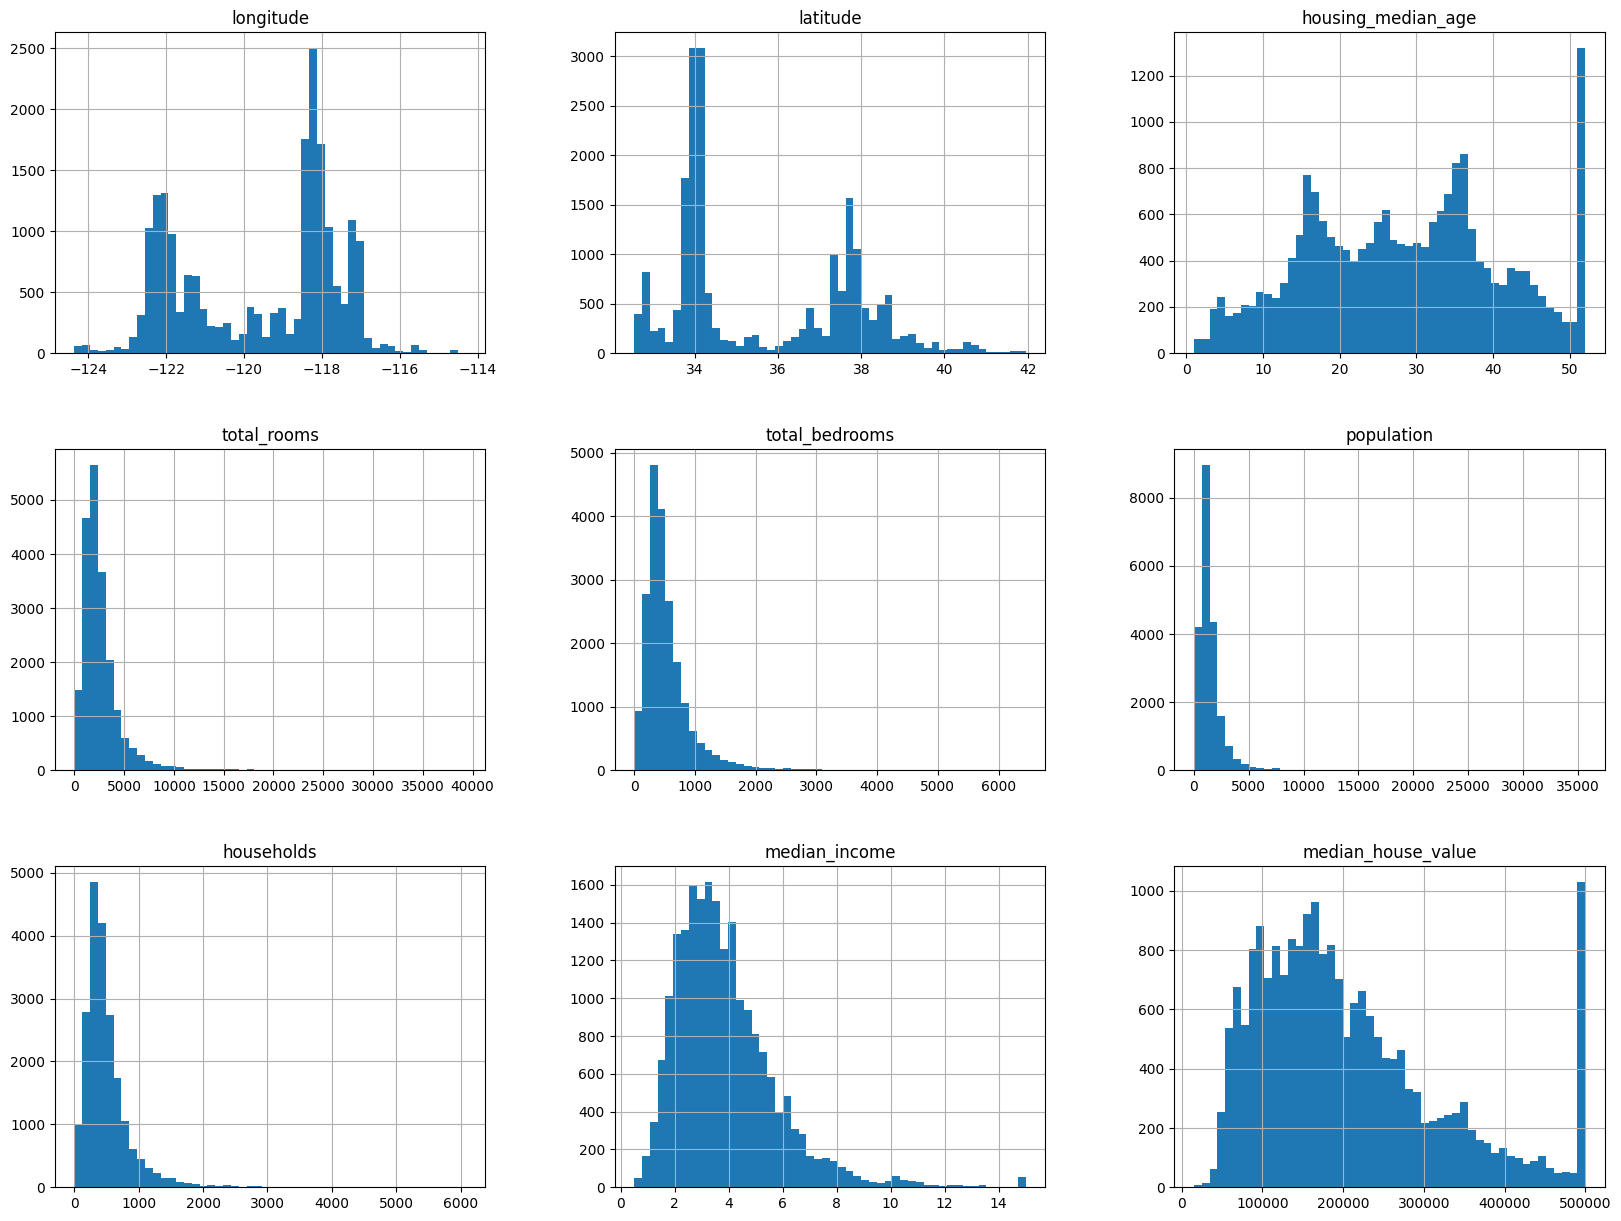

In [44]:
# CODE HERE
housing.hist(bins=50, figsize=(20,15))

#### Create a scatter plot between "longitude" in x axis and "latitude" in y axis with alpha = 0.1

<Axes: xlabel='longitude', ylabel='latitude'>

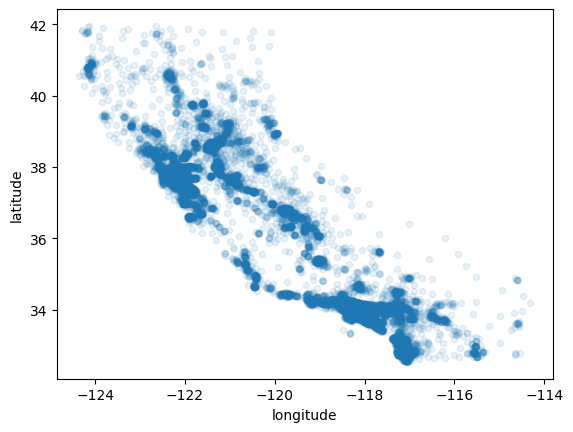

In [45]:
# CODE HERE
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


#### Make The radius of each circle represent the district’s population (option s), and the color represents the price (option c).

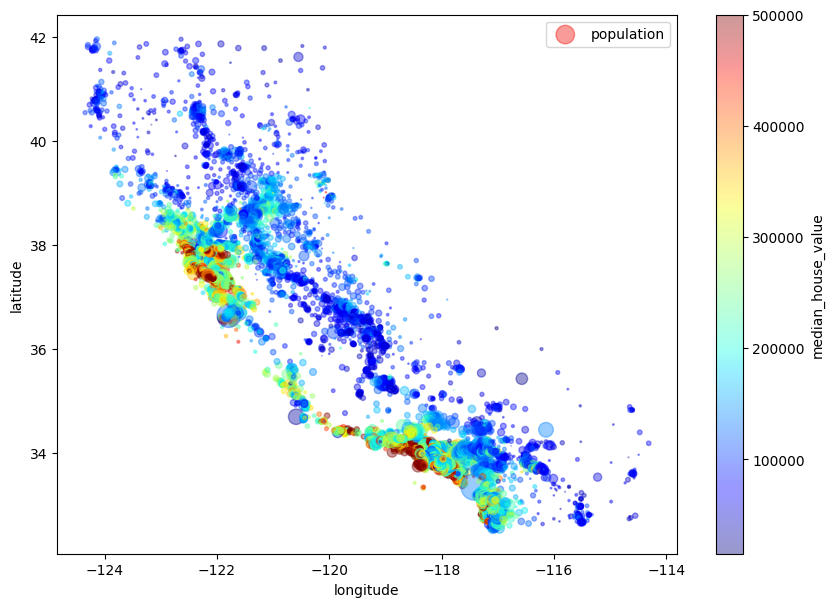

In [46]:
# CODE HERE
housing.plot(kind="scatter", x="longitude", y="latitude",
    s=housing['population']/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

#### Explore correlation between all continuous numeric variables using .corr() method.

In [47]:
# CODE HERE
numeric_columns = housing.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
correlation_matrix


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


#### Use seaborn method to convert the correlation matrix to a heatmap plot
#### It's usually a better way to look for correlations among the features

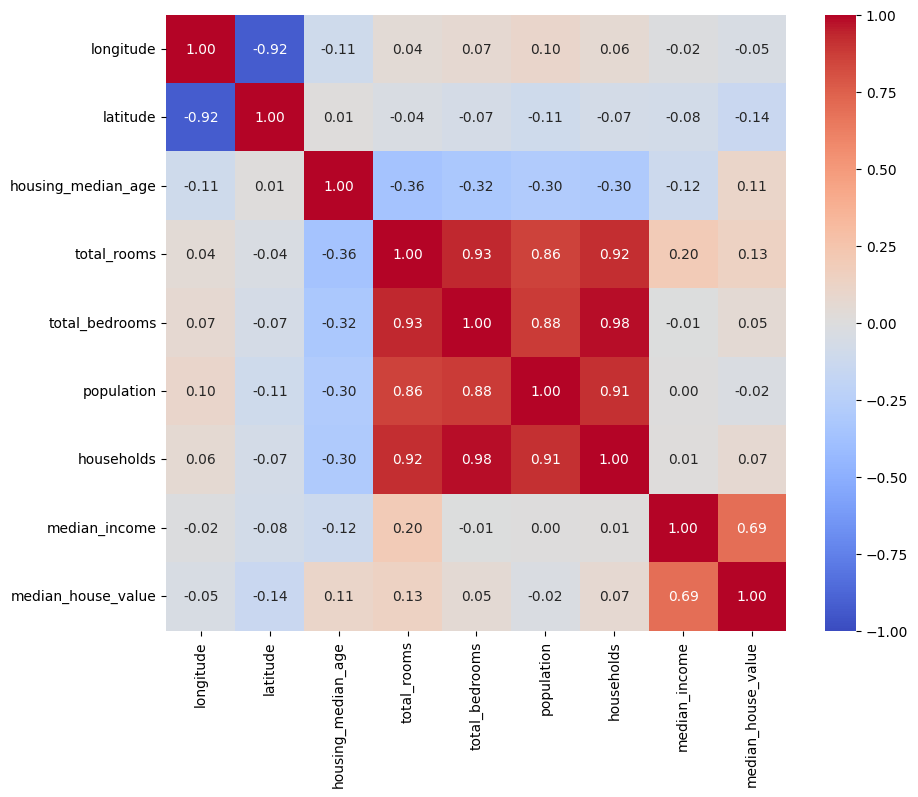

In [48]:
corr = housing.select_dtypes('number').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()


#### Another way to check for correlation between attributes is to use the pandas scatter_matrix() function

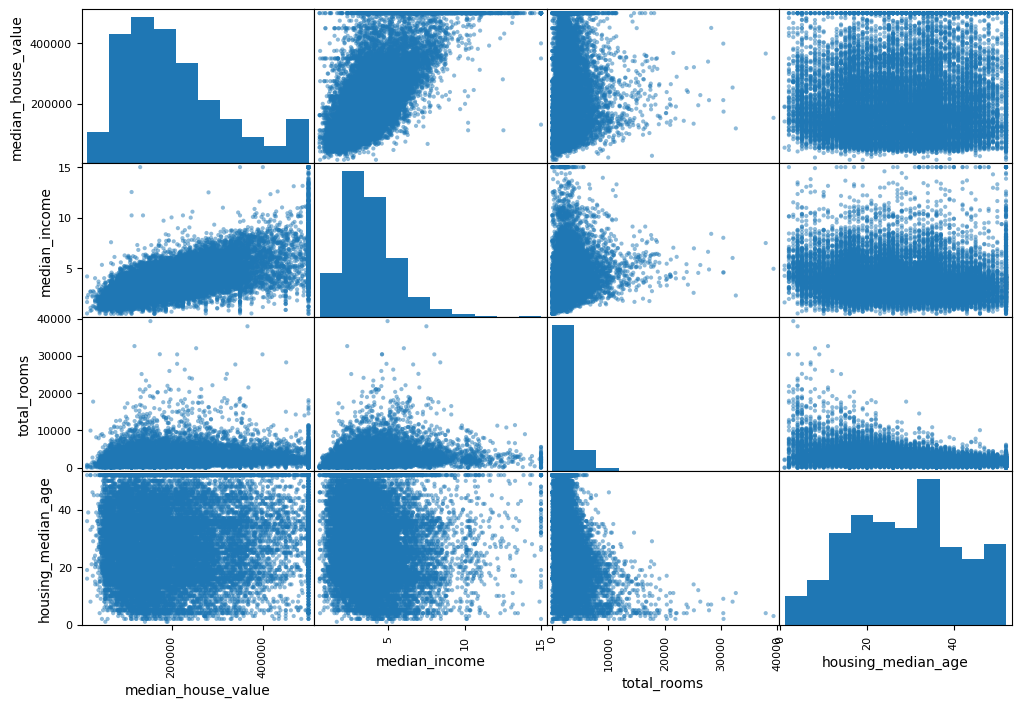

In [49]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
# CODE HERE
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

#### *CHALLENGE*
#### change the color of the plot based on ocean_proximity category
#### hint: use seaborn pairplot

In [50]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "ocean_proximity"]

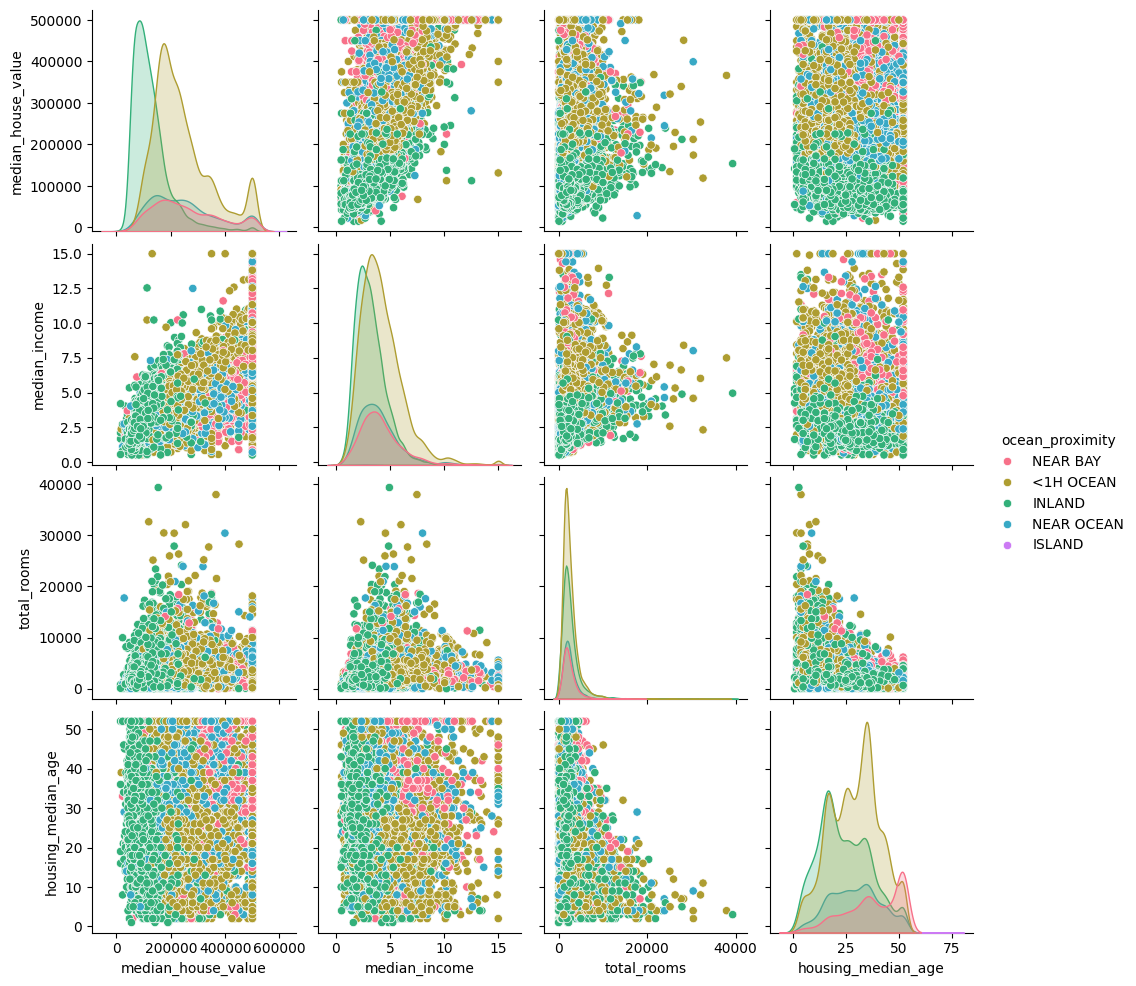

In [51]:
# CODE HERE
sns.pairplot(housing[attributes], hue='ocean_proximity', palette='husl', diag_kind='kde')
plt.show()

#### Create a scatter plot between median_income and median_house_value

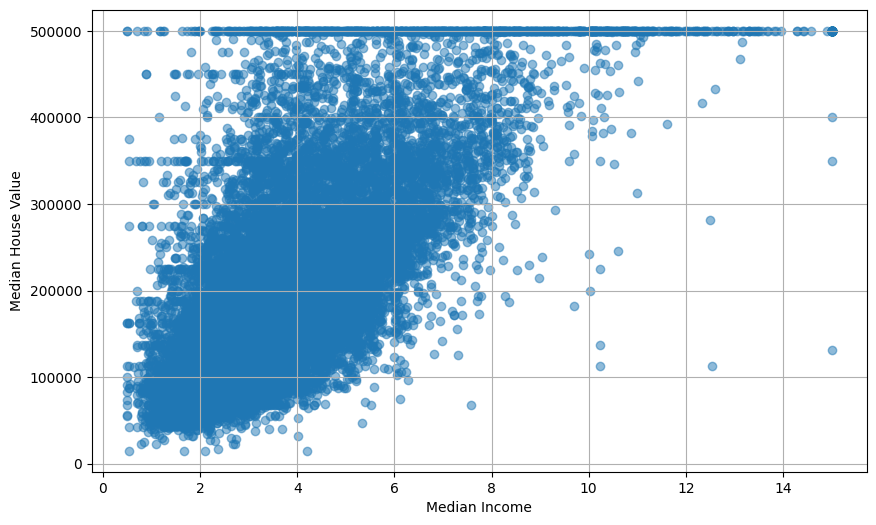

In [52]:
# CODE HERE

plt.figure(figsize=(10, 6))
plt.scatter(housing["median_income"], housing["median_house_value"], alpha=0.5)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.grid(True)
plt.show()


#### Create a boxplot to show the relation between median_house_value and the categorical feature ocean_proximity

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10368\972127873.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="median_house_value", y="ocean_proximity", data=housing, palette="dark", orient="h")


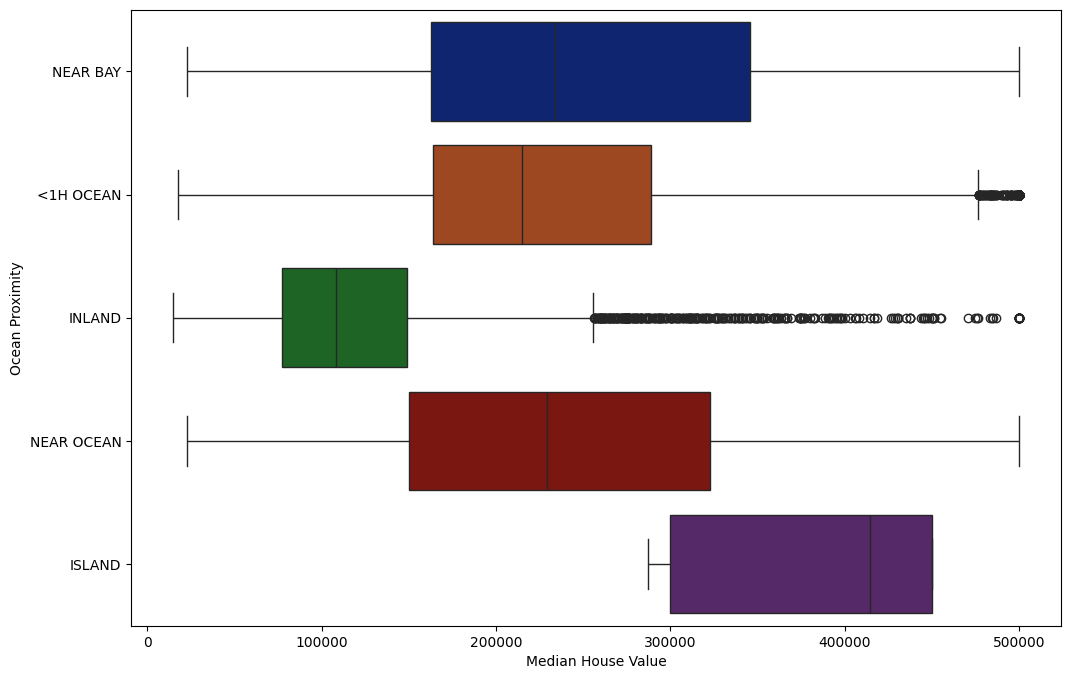

In [53]:

plt.figure(figsize=(12, 8))

sns.boxplot(x="median_house_value", y="ocean_proximity", data=housing, palette="dark", orient="h")

plt.xlabel("Median House Value")
plt.ylabel("Ocean Proximity")

# Show plot
plt.show()


***
# 3- Prepare the data
***

## A- Data Cleaning

#### Create a Series that displays the total count of missing values per column.

In [54]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### the total_bedrooms attribute has some missing values. You have three options:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).

You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna()
methods:

#### Use the third option and fill the total_bedrooms null values with the median

In [55]:
# CODE HERE
median_total_bedrooms = housing['total_bedrooms'].median()

housing['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)
housing.isna().sum()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10368\2055486216.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Check if there any zeros in dataframe.

In [56]:
(housing == 0).sum(axis=0)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Great there aren't any zeros in the data.
#### Zeros may sometimes be missing values so we need to take a closer look at them

## B- Attribute Combinations

#### create new attribute called rooms_per_household between total_rooms and households

In [57]:
# CODE HERE
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']


#### create new attribute called bedrooms_per_room between total_bedrooms and total_rooms

In [58]:
# CODE 
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']


#### create new attribute called population_per_household between population and households

In [59]:
# CODE HERE
housing['population_per_household'] = housing['population'] / housing['households']


#### Now let's look for correlation again

In [60]:
# CODE HERE
numeric_columns = housing.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
correlation_matrix



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.081205,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.098619,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.135622,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187381,-0.024581
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,0.001765,0.071649,-0.028325
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.010035,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.080598,0.034498,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,0.326895,-0.545298,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.233303,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001765,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.370308,-0.004852


#### now let's remove old features("total_bedrooms", "total_rooms", "population", "households"), use drop method
#### Note: make inplace parameter True to save changes

In [61]:
# CODE HERE

#housing.drop(columns=["total_bedrooms", "total_rooms", "population", "households"], inplace=True)


## C- Handling Text and Categorical Attributes

#### We have 5 classes in ocean_proximity.
#### To handle this categorical feature we create housing_cat that contain ocean_proximity.

In [62]:
print(housing["ocean_proximity"].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [63]:
housing_cat = housing[["ocean_proximity"]]

#### Now use sklearn OneHotEncoder to fit and transform housing_cat.

In [64]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

housing_cat_encoded = encoder.fit_transform(housing_cat)

housing_cat_encoded_array = housing_cat_encoded.toarray()
housing_cat_encoded_array

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## D- Feature Scaling

#### To scale numerical values we created housing_num that contain numerical values. 
#### Now use sklearn StandardScaler to fit and transform housing_num.

In [65]:
from sklearn.preprocessing import StandardScaler
housing_num = housing.drop("ocean_proximity", axis=1)
scaler = StandardScaler()
housing_num_scaled = scaler.fit_transform(housing_cat_encoded_array)
housing_num_scaled

# CODE HERE

array([[-0.89115574, -0.68188905, -0.01556621,  2.83074203, -0.38446649],
       [-0.89115574, -0.68188905, -0.01556621,  2.83074203, -0.38446649],
       [-0.89115574, -0.68188905, -0.01556621,  2.83074203, -0.38446649],
       ...,
       [-0.89115574,  1.46651424, -0.01556621, -0.35326426, -0.38446649],
       [-0.89115574,  1.46651424, -0.01556621, -0.35326426, -0.38446649],
       [-0.89115574,  1.46651424, -0.01556621, -0.35326426, -0.38446649]])

# Custom Transformers


####  Here is a small transformer class that adds the combined attributes wediscussed earlier:

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin

# Assuming 'housing' is your DataFrame containing the data

# Define the CombinedAttributesAdder class
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self  # Nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Assuming 'housing' is your DataFrame containing the data
# Assuming 'housing_extra_attribs' is the DataFrame to store the transformed data

# Instantiate the CombinedAttributesAdder class
attr_reader = CombinedAttributesAdder(add_bedrooms_per_room=True)

# Transform the housing data using the custom transformer
housing_extra_attribs = attr_reader.transform(housing.values)

# Create a DataFrame from the transformed data
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns) + ["rooms_per_household", "population_per_household", "bedrooms_per_room"],
    index=housing.index
)

housing_extra_attribs.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,2.732919,1.0,0.020989
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,2.956685,1.0,0.024975
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.80226,2.957661,1.0,0.015627
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,2.283154,1.0,0.031708
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,2.879646,1.0,0.027396


In [84]:
attr_reader = CombinedAttributesAdder(add_bedrooms_per_room=True)

housing_extra_attribs = attr_reader.transform(housing.values)

housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns) + ["rooms_per_household", "population_per_household", "bedrooms_per_room"],
    index=housing.index
)

housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,2.732919,1.0,0.020989
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,2.956685,1.0,0.024975
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.80226,2.957661,1.0,0.015627
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,2.283154,1.0,0.031708
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,2.879646,1.0,0.027396


#### Use the above class (CombinedAttributesAdder) to create instance called attr_reader, then transform housing values and save them in a variable called housing_extra_attribs.

In [73]:
attr_reader = CombinedAttributesAdder(add_bedrooms_per_room=True)

# Transform the housing values
housing_extra_attribs = attr_reader.transform(housing.values)

# Create a DataFrame from the transformed data
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns) + ["rooms_per_household", "population_per_household", "bedrooms_per_room"],
    index=housing.index
)

housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.80226,8.288136,2.80226,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,6.281853,2.181467,0.172096


In [ ]:
print(housing.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')


In [ ]:
print(housing_extra_attribs)

[[-122.23 37.88 41.0 ... 2.7329192546583854 1.0 0.02098915289256198]
 [-122.22 37.86 21.0 ... 2.9566847147022073 1.0 0.024974858520454907]
 [-122.24 37.85 52.0 ... 2.957661290322581 1.0 0.015626677149504505]
 ...
 [-121.22 39.43 17.0 ... 2.238331678252234 1.0 0.041335368297235955]
 [-121.32 39.43 18.0 ... 2.5101214574898787 1.0 0.04125939414961267]
 [-121.24 39.37 16.0 ... 2.007930785868781 1.0 0.04209264171681456]]


# Transformation Pipelines


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#### Create your own pipline for numerical attributes. It should contain SimpleImputer, CombinedAttributesAdder, and StandardScaler. call it num_pipeline.

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num) 
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

IndexError: index 12 is out of bounds for axis 1 with size 12

#### now create a full pipeline called full_pipeline , use num_pipeline for numerical attributes  and OneHotEncoder for catigorcal attributes .

#### fit and transform full_pipeline with housing data then saved it in housing_prepared

In [80]:
# Fit and transform the full pipeline with housing data
housing_prepared = full_pipeline.fit_transform(housing)


IndexError: index 12 is out of bounds for axis 1 with size 12

In [ ]:
print(housing_prepared[:5])

[[-1.32783522  1.05254828  0.98214266 -0.8048191  -0.97247648 -0.9744286
  -0.97703285  2.34476576  2.12963148  0.62855945 -0.04959654 -1.02998783
   0.          0.          0.          1.          0.        ]
 [-1.32284391  1.04318455 -0.60701891  2.0458901   1.35714343  0.86143887
   1.66996103  2.33223796  1.31415614  0.32704136 -0.09251223 -0.8888972
   0.          0.          0.          1.          0.        ]
 [-1.33282653  1.03850269  1.85618152 -0.53574589 -0.82702426 -0.82077735
  -0.84363692  1.7826994   1.25869341  1.15562047 -0.02584253 -1.29168566
   0.          0.          0.          1.          0.        ]
 [-1.33781784  1.03850269  1.85618152 -0.62421459 -0.71972345 -0.76602806
  -0.73378144  0.93296751  1.16510007  0.15696608 -0.0503293  -0.4496128
   0.          0.          0.          1.          0.        ]
 [-1.33781784  1.03850269  1.85618152 -0.46240395 -0.61242263 -0.75984669
  -0.62915718 -0.012881    1.17289952  0.3447108  -0.08561576 -0.63908657
   0.      

# 4- Create a Test Set and Train Set

#### Use model_selection.train_test_split from sklearn to split the data into training and testing sets. 
#### Note: Set random_state=42 to get the same result

In [ ]:
# CODE HERE
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


#### Let’s also separate the predictors and the labels to housing and housing_labels
#### (note that drop() creates a copy of the data and does not affect strat_train_set):

In [ ]:
# CODE HERE
housing = train_set.drop("median_house_value", axis=1) 
housing_labels = train_set["median_house_value"].copy() 


# Great Job!
# #shAI_Club